In [1]:
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Input/output options
args = WorkflowInputs(
    images=["E:/data/train/Udul-1-34/rep_01/PNGImages/1000067_2022_06_02_12_00_09-6-43-TA02-RGB1_pot_C5_Udul-1-34-01.png"],
    names="image1",
    result="segmentation_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 200
pcv.params.text_size = 5
pcv.params.text_thickness = 5

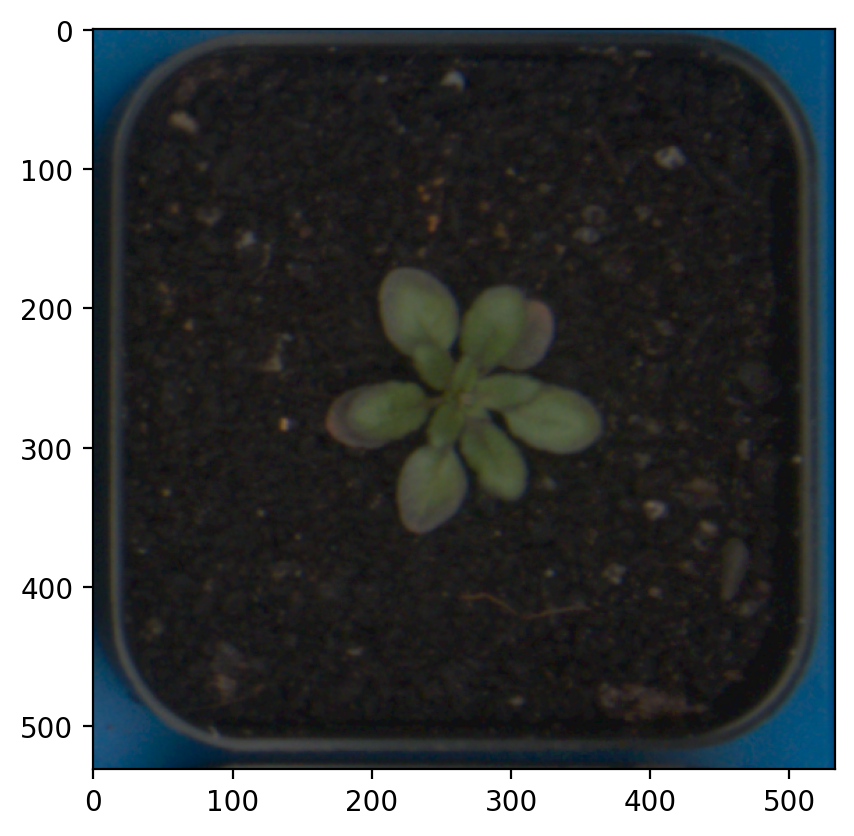

In [4]:
img, path, filename = pcv.readimage(filename=args.image1)

In [5]:
img.size

849069

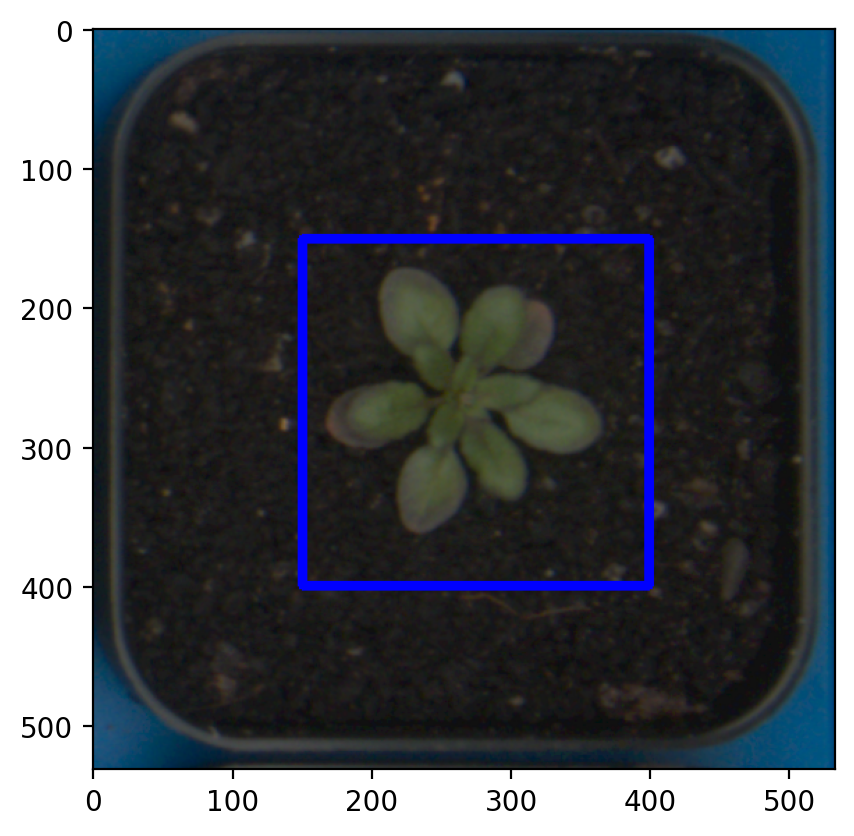

In [6]:
crop_img = pcv.crop(img=img, x=150, y=150, h=250, w=250)

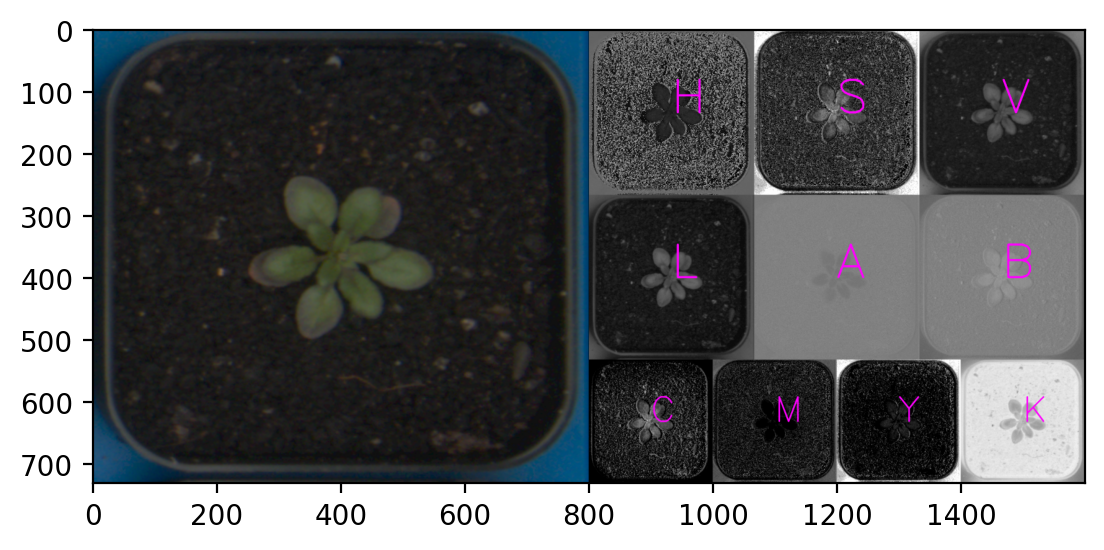

In [6]:
colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

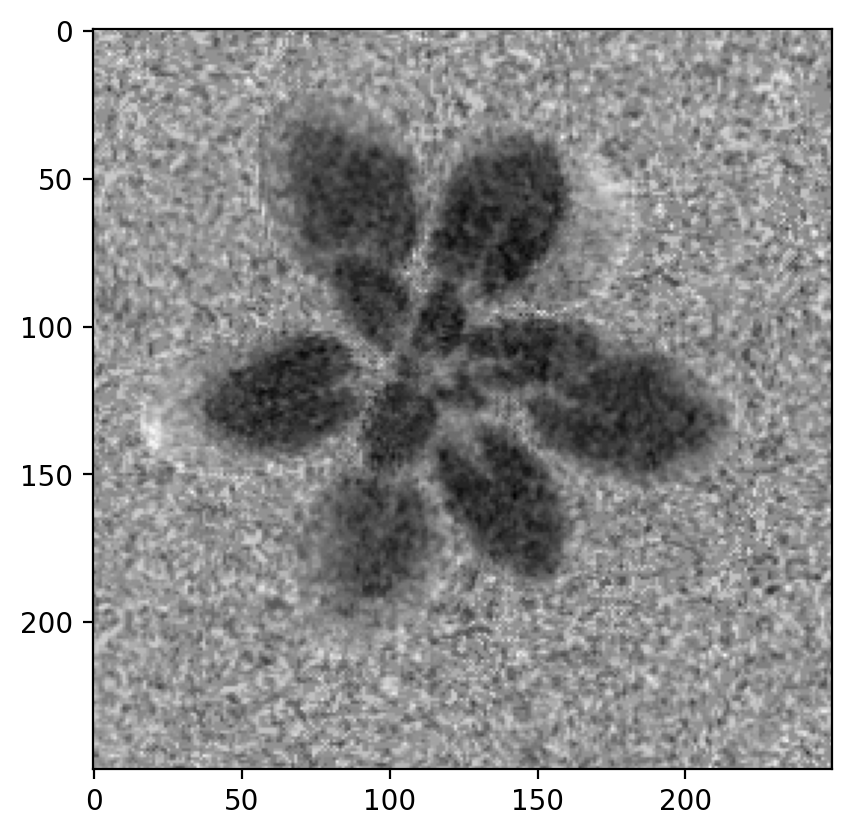

In [7]:
a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

In [8]:
hist_figure1 = pcv.visualize.histogram(a, bins=25)

alt.Chart(...)

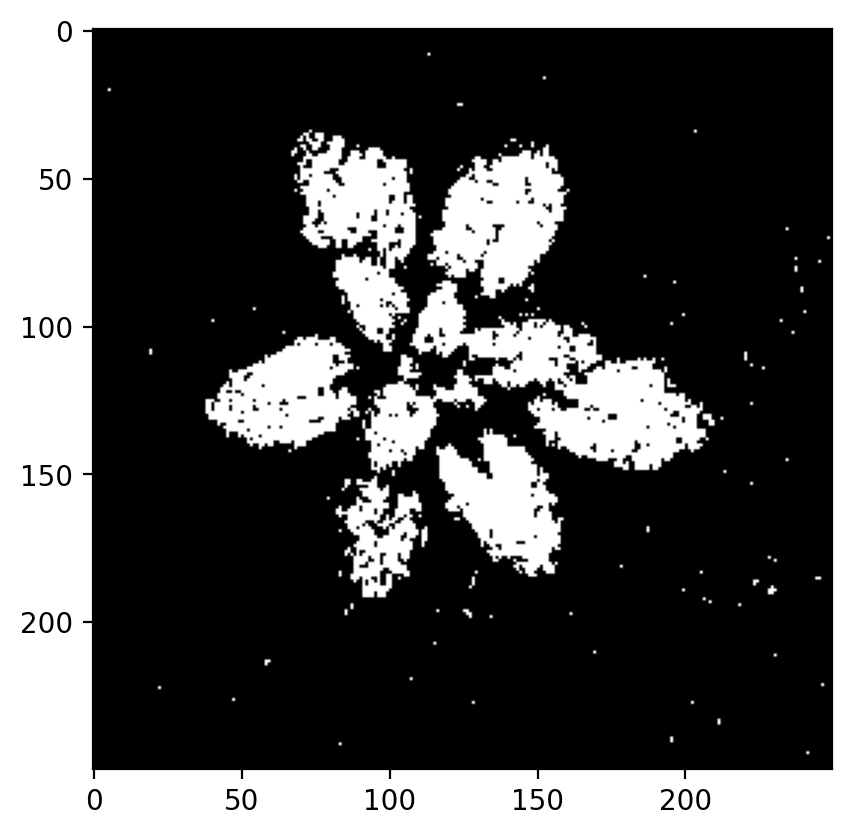

In [9]:
img_binary = pcv.threshold.binary(gray_img=a, threshold=120, object_type='dark')

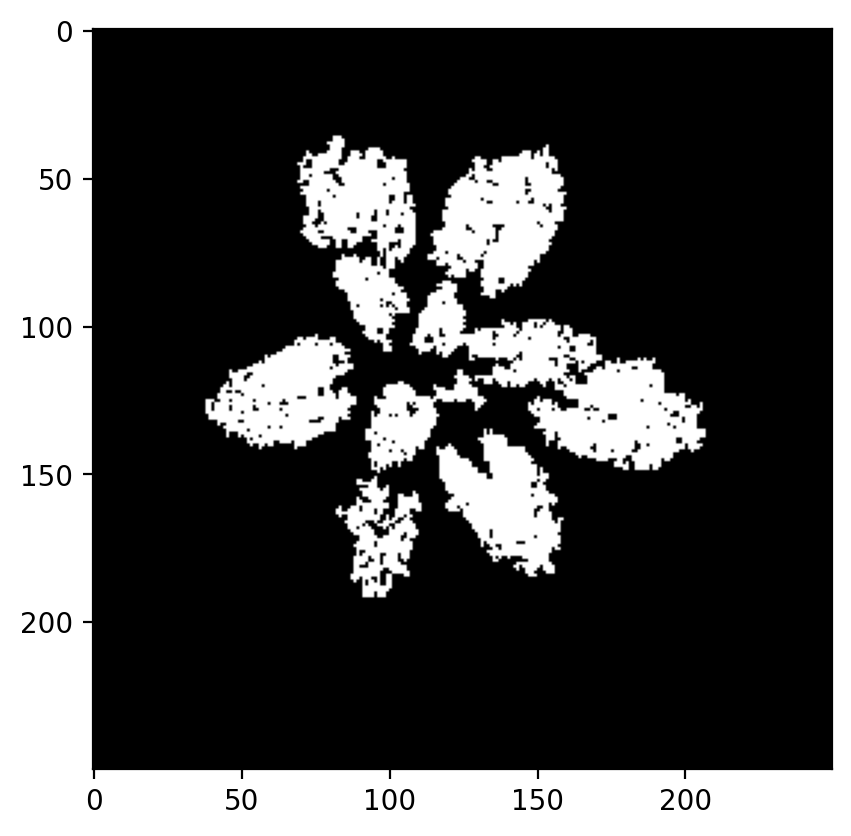

In [87]:
fill_image = pcv.fill(bin_img=img_binary, size=200)

In [10]:
masked = pcv.apply_mask(img=img, mask=fill_image, mask_color="black")

NameError: name 'fill_image' is not defined

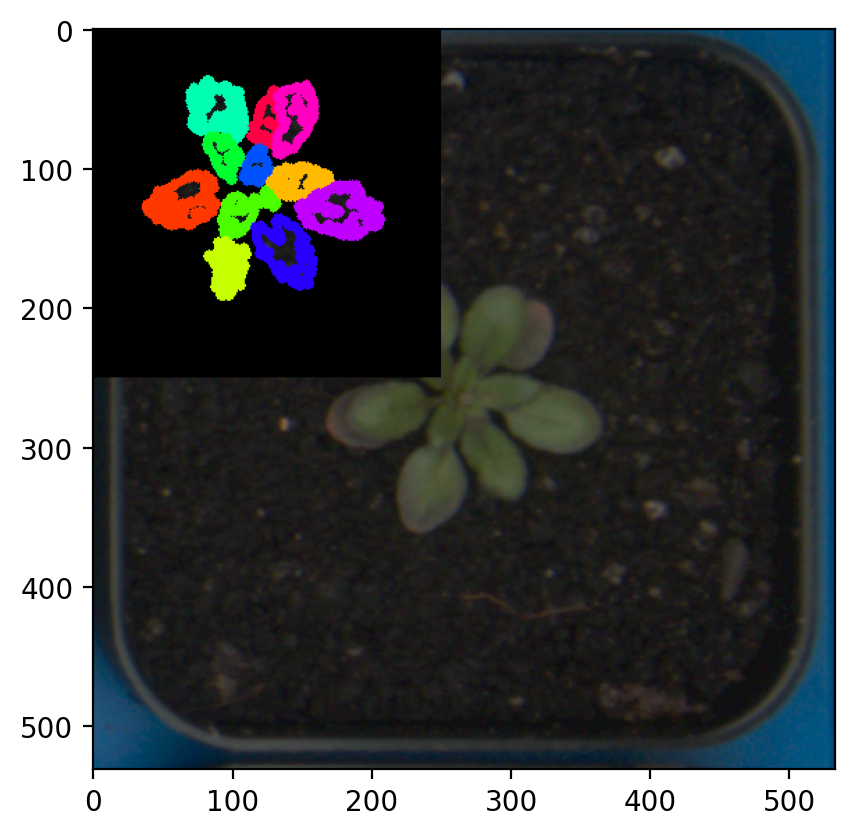

In [95]:
labels = pcv.watershed_segmentation(rgb_img=masked, mask=fill_image, distance=15, label="default")

In [11]:
count=pcv.outputs.observations["default"]["estimated_object_count"]["value"]
print(count)

KeyError: 'default'

In [12]:
n_labels = len(np.unique(labels)) - 1

shape_img = pcv.analyze.size(img=crop_img, labeled_mask=labels, n_labels=n_labels)

NameError: name 'labels' is not defined